# HR ATTRIBUTION

In [119]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# 1.) 

In [120]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [121]:
df = pd.read_csv("/Users/bharatsingh/Downloads/CLASSWORKWEEK4/HR_Analytics.csv")

In [122]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)

In [123]:
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]

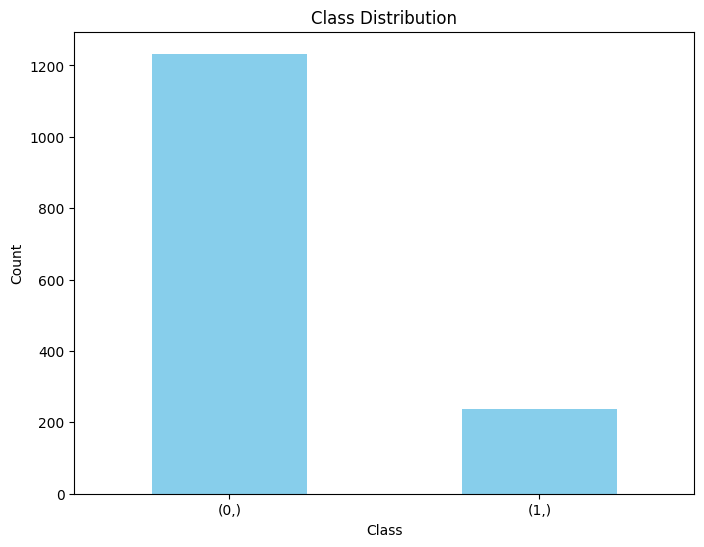

In [124]:
class_counts = y.value_counts()


plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()



In [125]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True)




In [126]:
x_train,x_test,y_train,y_test=train_test_split(X,
 y, test_size=0.20, random_state=42)


# 2.) 

In [127]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY :  0.78


# 3.) 

In [128]:

# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier(random_state=42)

scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [129]:
clf = tree.DecisionTreeClassifier(**best_params, random_state =42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) 

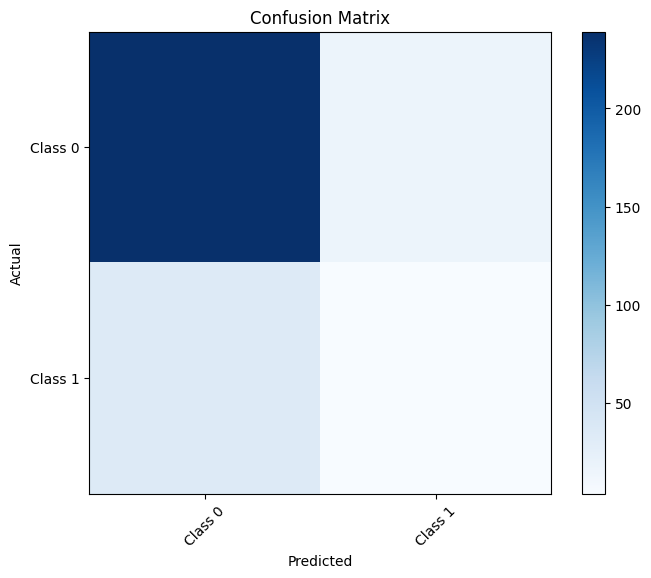

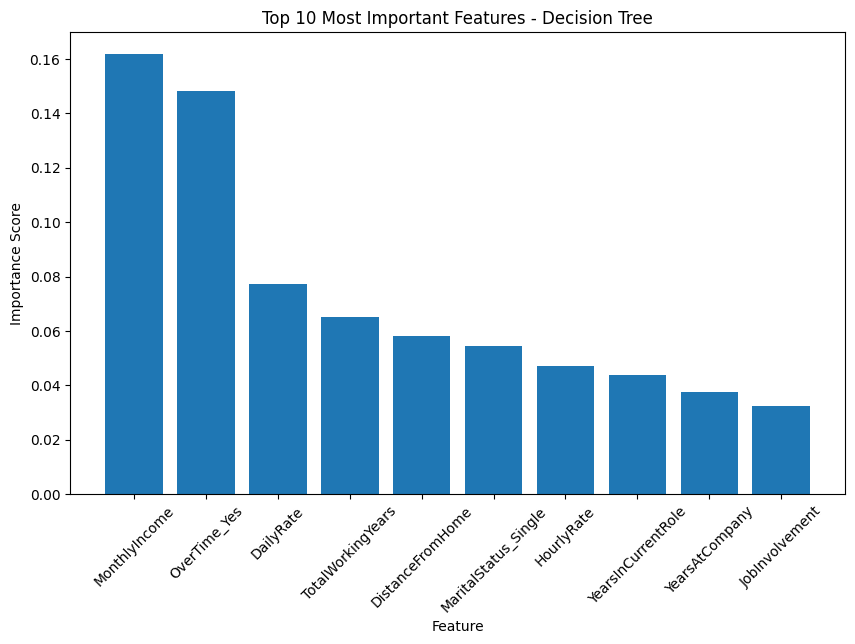

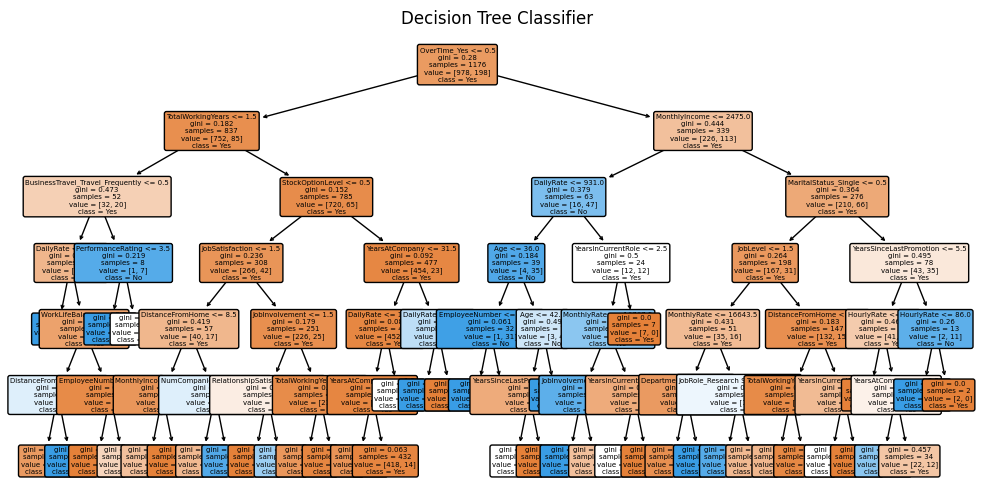

In [132]:
# Make predictions on the test data
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




feature_importance = clf.feature_importances_

# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
top_feature_names = X.columns[top_feature_indices]
top_feature_importance = feature_importance[top_feature_indices]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=["Yes", "No"], rounded=True, fontsize=5)
plt.title('Decision Tree Classifier')
plt.show()



# 5.) Looking at the graphs. what would be your suggestions to try to improve employee retention? What additional information would you need for a better plan. Plot anything you think would assist in your assessment.

## ANSWER :

In [133]:
np.corrcoef(np.array(X["OverTime_Yes"]),[1 if i == True else 0 for i in y["Attrition"]])

array([[1.        , 0.24611799],
       [0.24611799, 1.        ]])

#### Following are my suggestions for employee retention:

1. Salary Considerations: Analyzing the relationship between employee attrition and variables related to compensation, such as MonthlyIncome and HourlyRate. Evaluate if offering higher salaries positively influences employee retention. This could involve considering pay raises or bonuses.


2. Work-Life Balance: Investigating factors related to work hours, such as Overtime and HourlyRate, to understand their impact on attrition. Explore strategies to enhance work-life balance, potentially by reducing overtime demands or adjusting hourly wages for overtime work.

#### For a better plan, we need:

Correlation Analysis: Examining the correlation between various factors (e.g., JobSatisfaction, WorkLifeBalance) and attrition. Conduct a comprehensive correlation analysis to identify key factors strongly associated with attrition. This could provide insights into specific areas to address for improving retention. Conducting a thorough correlation analysis and seeking input from employees can provide a more better understanding and help formulate a targeted retention strategy.

In [134]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [135]:
df1=pd.get_dummies(df,dtype='int')

In [136]:
df1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,0,0,1,0,1,1,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,1,0,1,1,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,0,0,0,1,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,1,0,0,1,0,1,1,0


# For our assessment, we look at the correlation heatmap.

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


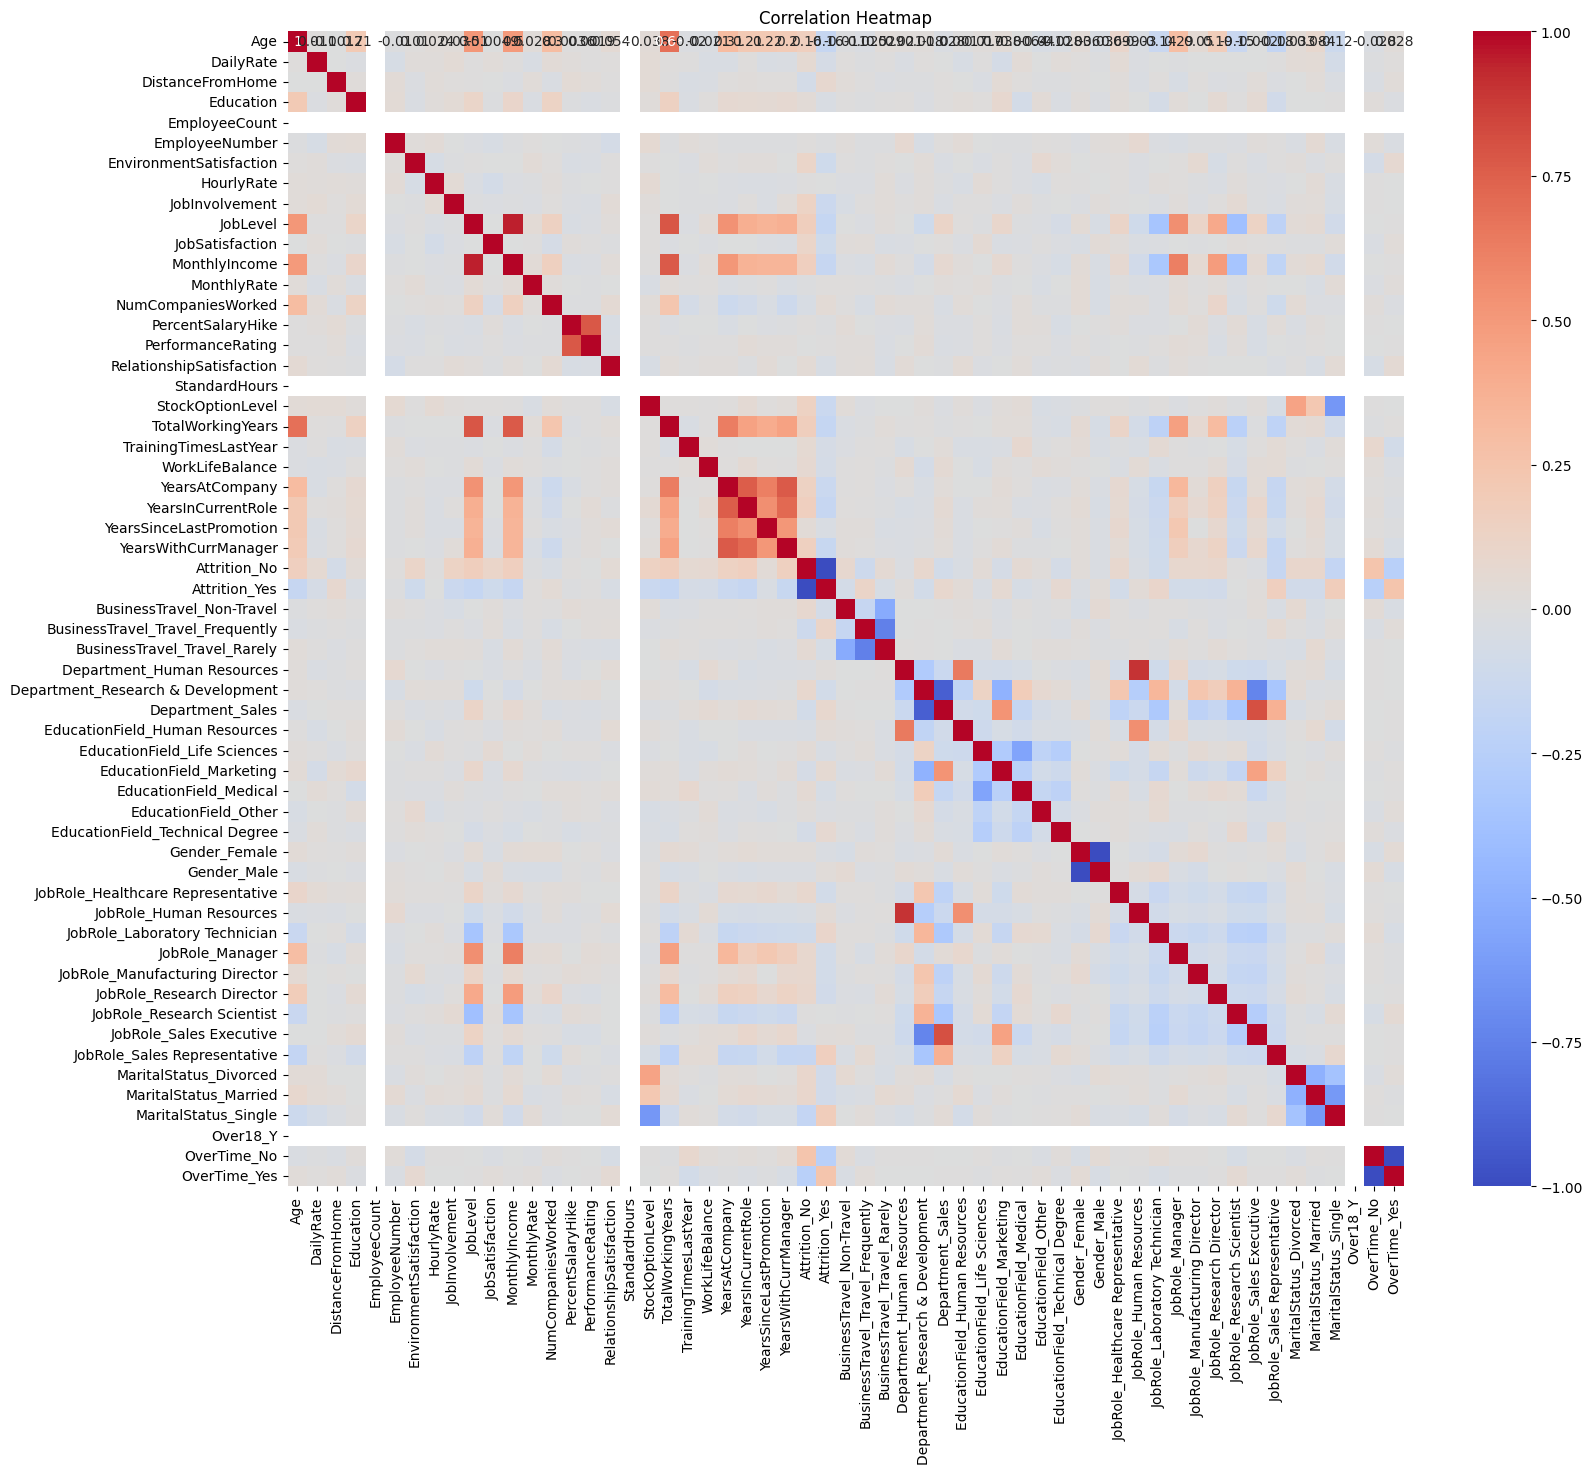

In [137]:
# Correlation Heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(df1.corr(), cmap="coolwarm", annot=True)
plt.title('Correlation Heatmap')
plt.show()

#### In the context of assessing factors related to employee attrition, a correlation heatmap can provide valuable insights into the relationships between different features in our dataset. 

#### 1. The correlation coefficient ranges from -1 to 1. A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. Features with high positive or negative correlations with Attrition can be important indicators.

#### 2. If there are features highly correlated with each other, we might consider excluding one of them to avoid redundancy in our analysis. 

#### 3. Features with a high correlation with the target variable may be prioritized for further analysis.

#### In addition to the correlation heatmap, pairplots can also be useful for visually assessing the distribution of individual features with respect to attrition. 

# 6.) 

In [138]:
x_train_experiment=x_train.copy()

In [139]:
x_train_experiment["OverTime_Yes"]=0.

In [140]:
y_pred_experiment=clf.predict(x_train_experiment)
y_pred=clf.predict(x_train)

In [141]:
y_pred-y_pred_experiment

array([ 0,  0,  0, ..., -1,  0,  0])

In [142]:
print("No. of people that could have been prevented from leaving:",sum(y_pred-y_pred_experiment))

No. of people that could have been prevented from leaving: 59


# 7.) If they company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [143]:
x_train_experiment["Y"]=y_pred
x_train_experiment["Y_exp"]=y_pred_experiment
x_train_experiment["Ret_Change"]=x_train_experiment["Y"]-x_train_experiment["Y_exp"]

In [144]:
# Change in Training Cost
sav=sum(x_train_experiment["Ret_Change"]*2.8*x_train_experiment["MonthlyIncome"])

In [145]:
# Cost of Lost Overtime
cost=2000*len(x_train[x_train["OverTime_Yes"]==1])

In [146]:
# Profit
print("Profit from the experiment:",sav-cost)

Profit from the experiment: -117593.99999999977


### After conducting the experiment, it was found that the proposed changes resulted in a loss of $117,593. This implies that if we were to implement the suggested modifications, the company would incur a significant financial setback. Therefore, it is advisable to continue with the current overtime responsibilities, as deviating from this approach could lead to further financial losses i.e. it is not profitable.

### To maximize company profits, we can do the following:
    
### 1. Talent Retention and Development: Develop a robust talent retention program to reduce attrition rates. Provide opportunities for professional development and training to enhance employee skills and job satisfaction.
   
### 2. Compensation and Benefits: Evaluate and adjust compensation packages to remain competitive in the industry. Offer performance-based incentives to motivate employees. Review and enhance employee benefits to ensure they align with industry standards.

# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

In [147]:
raise_amount=500

In [148]:
x_train_experiment=x_train.copy()
x_train_experiment["MonthlyIncome"]=x_train_experiment["MonthlyIncome"]+raise_amount
y_pred_experiment=clf.predict(x_train_experiment)
y_pred=clf.predict(x_train)
x_train_experiment["Y"]=y_pred
x_train_experiment["Y_exp"]=y_pred_experiment
x_train_experiment["Ret_Change"]=x_train_experiment["Y"]-x_train_experiment["Y_exp"]

print("Retention difference",sum(x_train_experiment["Ret_Change"]))

sav=sum(x_train_experiment["Ret_Change"]*2.8*x_train_experiment["MonthlyIncome"])

cost=raise_amount*len(x_train)

print("Profit is:",sav-cost)

Retention difference 22
Profit is: -416449.6000000001


#### We retained 22 employees but the company still incurred losses.

In [149]:
profits=[]
for raise_amount in range(-1000,1000,100):
    x_train_experiment=x_train.copy()
    x_train_experiment["MonthlyIncome"]=x_train_experiment["MonthlyIncome"]+raise_amount
    y_pred_experiment=clf.predict(x_train_experiment)
    y_pred=clf.predict(x_train)
    x_train_experiment["Y"]=y_pred
    x_train_experiment["Y_exp"]=y_pred_experiment
    x_train_experiment["Ret_Change"]=x_train_experiment["Y"]-x_train_experiment["Y_exp"]

    print("Retention difference",sum(x_train_experiment["Ret_Change"]))

    sav=sum(x_train_experiment["Ret_Change"]*2.8*x_train_experiment["MonthlyIncome"])

    cost=raise_amount*len(x_train)

    print("Profit is:",sav-cost)
    profits.append(sav-cost)

Retention difference -16
Profit is: 1087584.4
Retention difference -14
Profit is: 979524.0
Retention difference -13
Profit is: 864992.8
Retention difference -12
Profit is: 750738.8
Retention difference -12
Profit is: 629778.8
Retention difference -9
Profit is: 530138.0
Retention difference -7
Profit is: 424200.0
Retention difference -4
Profit is: 326096.4
Retention difference -1
Profit is: 228440.8
Retention difference -1
Profit is: 110714.8
Retention difference 0
Profit is: 0.0
Retention difference 6
Profit is: -75328.40000000001
Retention difference 15
Profit is: -127503.60000000002
Retention difference 15
Profit is: -240914.8
Retention difference 21
Profit is: -311586.80000000005
Retention difference 22
Profit is: -416449.6000000001
Retention difference 22
Profit is: -527889.6000000001
Retention difference 22
Profit is: -639329.6000000001
Retention difference 22
Profit is: -750769.6000000001
Retention difference 23
Profit is: -854999.6000000001


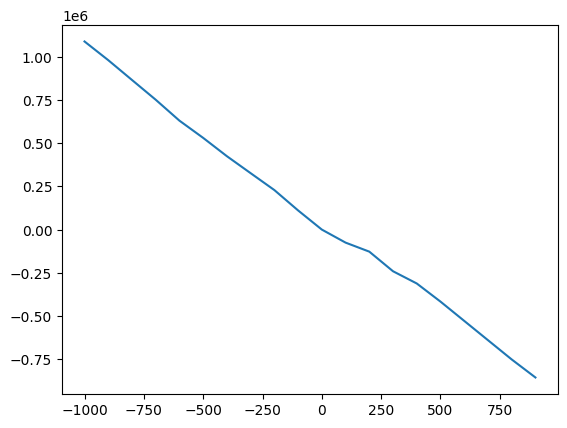

In [150]:
plt.plot(range(-1000,1000,100),profits)
plt.show()

### x-axis: Extra amount given to employees

### y-axis: Profits incurred by company

### We see that as the extra amount given to employees increase, the company incurs losses. 

### To maximize profits based on this experiment, it shows that company needs to pay less to the employees and not more. It also needs to work on operational efficiency i.e. implement efficiency measures to optimize operations and reduce unnecessary costs, regularly review and adjust performance metrics to ensure alignment with company goals and explore technological solutions that can enhance productivity and streamline processes.